In [2]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use("ggplot")
import pandas as pd
import pymysql.cursors
import random
import sys
# from pylab import *
# %pip install seaborn

There are two documents attached; one contains the list of people who registered for a program while the other contains the list of those that eventually got enrolled.

1. Applying Data Analysis and Visualization, glean out insights from both datasets with respect to the Gender of the applicants.
2. What is the probability that a randomly selected registered female will be enrolled in the program?
3. What is the probability that a randomly selected registered male will be enrolled in the program?
4. What is the probability that a registered applicant will eventually enroll in the program?


In [3]:
# connection = pymysql.connect(host='localhost',
#                              user='root',
#                              password='',
#                              database='applicants',
#                              charset ='utf8mb4',
#                              cursorclass = pymysql.cursors.DictCursor)

# with connection.cursor() as cursor:
#     # Read a single record
#     sql = "SELECT `unnamed: 0`, `first name`, `last name`, `source`, `course`, `track`, `gender` FROM `enrolled_applicants1`"
    
#     cursor.execute(sql)

#     result = cursor.fetchall()
#     print(result)

In [4]:
data = pd.read_csv('~/Desktop\Data Science Univel\Programs\Internship Projects\enrolled applicants.csv')
data

,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,1120,Robert,Mccain,WEBSITE,Full Stack,Weekday,male
1,2557,Russel,Reagin,Mr Simps,Full Stack,Weekday,male
2,1682,Barry,Dickson,WEBSITE,Full Stack,Weekday,male
3,1961,Allen,Williams,Mr Simps,NaN,Weekday,male
4,295,Brian,Bryon,Social Media,Python For Data Science,Weekend,male
...,...,...,...,...,...,...,...
1761,2020,Edward,Johnston,WEBSITE,Backend With Python Django,Weekday,male
1762,1295,Brian,Hargrove,Social Media,Full Stack,Weekday,male
1763,2827,Grady,Sullens,Social Media,Frontend Web Development,ONLINE,male
1764,1894,Felipe,Fassino,Social Media,Figma Design to Webflow,Weekday,male


In [5]:
data1 = data[['FIRST NAME','GENDER']]
data1

,FIRST NAME,GENDER
0,Robert,male
1,Russel,male
2,Barry,male
3,Allen,male
4,Brian,male
...,...,...
1761,Edward,male
1762,Brian,male
1763,Grady,male
1764,Felipe,male


In [13]:
data.isnull().sum()

Unnamed: 0     0
FIRST NAME     0
LAST NAME      0
SOURCE        12
COURSE        25
TRACK          0
GENDER         0
dtype: int64

In [6]:
data['GENDER']

0       male
1       male
2       male
3       male
4       male
        ... 
1761    male
1762    male
1763    male
1764    male
1765    male
Name: GENDER, Length: 1766, dtype: object

In [8]:
enrolled_male = data['GENDER'] == 'male'
enrolled_male

0       True
1       True
2       True
3       True
4       True
        ... 
1761    True
1762    True
1763    True
1764    True
1765    True
Name: GENDER, Length: 1766, dtype: bool

In [11]:
enrolled_female = data['GENDER'][data['GENDER'] == 'female']
enrolled_female

5       female
16      female
23      female
46      female
80      female
         ...  
1724    female
1738    female
1744    female
1753    female
1760    female
Name: GENDER, Length: 143, dtype: object

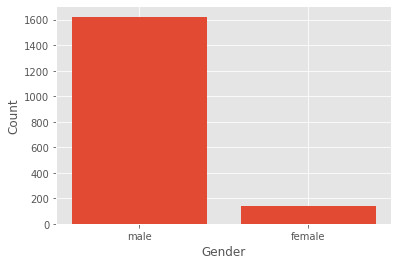

In [4]:
# Visualization of enrolled 'gender' data in the file.  
fig, ax = plt.subplots()  
x = data1.GENDER.unique()  
# Counting 'Males' and 'Females' in the dataset  
y = data1.GENDER.value_counts()  
# Plotting the bar graph  
ax.bar(x, y)  
ax.set_xlabel('Gender')  
ax.set_ylabel('Count')
# sns.countplot(data1.GENDER)  
plt.show()  


In [28]:
# plt.figure(figsize = (20,10)) # increase figure size or chart
# plt.pie(x, labels = y.keys())
# plt.show()

In [16]:
registered_data = pd.read_csv(r"C:\Users\ACER\Desktop\Data Science Univel\Programs\Internship Projects\registered applicants.csv")
registered_data


,Unnamed: 0,FIRST NAME,LAST NAME,SOURCE,COURSE,TRACK,GENDER
0,2373,Brian,May,Social Media,Python For DataScience,Weekend,male
1,758,Leon,Melvin,Social Media,Product Design(UI/UX),Weekend,male
2,2287,Juan,Harris,Mr Simps,Product Design(UI/UX),Weekday,male
3,2480,Gilbert,Denson,Social Media,Figma Design to Webflow,Weekend,male
4,1359,Larry,Williams,WEBSITE,Python For DataScience,Weekday,male
...,...,...,...,...,...,...,...
3671,1990,Donald,Peno,Social Media,Python For Data Science,Weekday,male
3672,245,Patrick,Azar,Mr Simps,Full Stack,Weekday,male
3673,2548,Billy,Jones,WEBSITE,Full Stack,ONLINE,male
3674,2162,Luis,Tellez,Social Media,Full Stack,Weekday,male


In [14]:
data2 = registered_data[['FIRST NAME','GENDER']]
data2.insert(0, 'ID', range(0, 0 + len(registered_data)))
# data2.columns = ['First name', 'Gender']
data2
# print(data2.dtypes)
# data2['GENDER'] = data2['GENDER'].astype(float)

,ID,FIRST NAME,GENDER
0,0,Brian,male
1,1,Leon,male
2,2,Juan,male
3,3,Gilbert,male
4,4,Larry,male
...,...,...,...
3671,3671,Donald,male
3672,3672,Patrick,male
3673,3673,Billy,male
3674,3674,Luis,male


In [17]:
# Set out the male gender
registered_male = registered_data['GENDER'] == 'male'
registered_male

0        True
1        True
2        True
3        True
4        True
        ...  
3671     True
3672     True
3673     True
3674     True
3675    False
Name: GENDER, Length: 3676, dtype: bool

In [18]:
# Set out female gender from the data
registered_female = registered_data['GENDER'][registered_data['GENDER'] == 'female']
registered_female

5       female
11      female
13      female
42      female
47      female
         ...  
3657    female
3658    female
3664    female
3668    female
3675    female
Name: GENDER, Length: 717, dtype: object

In [39]:
# Let's start by visualizing the distribution of gender in the dataset.  
# fig, ax = plt.subplots()  
# x = data2.GENDER.unique()  
# Counting 'Males' and 'Females' in the dataset  
# y = data2.GENDER.count()
# Plotting the bar graph  
# data2.groupby(['ID','GENDER']).size().unstack().plot(kind='bar',stacked=True)
# ax.bar(x, y)  
# ax.set_xlabel('Gender')  
# ax.set_ylabel('Count')
# sns.countplot(data1.GENDER)  

# plt.figure(figsize=(10,25))
# plt.barh(data2.GENDER, data2.ID)
# plt.show()  


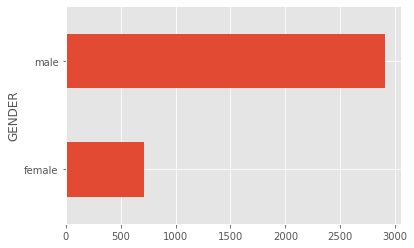

In [35]:
# Visualization of the data for registered applicants.
# data2.groupby(['GENDER']).size().plot(kind='bar',stacked=True)
data2.groupby("GENDER")["ID"].count().plot.barh()
plt.show()

In [27]:
# probability that a randomly selected registered female will be enrolled in the program?
probability_female = registered_female.count()/registered_data.count()
probability_female.round(2)

Unnamed: 0    0.2
FIRST NAME    0.2
LAST NAME     0.2
SOURCE        0.2
COURSE        0.2
TRACK         0.2
GENDER        0.2
dtype: float64

In [26]:
# What is the probability that a randomly selected registered male will be enrolled in the program?
probability_male = registered_male.count()/registered_data.count()
probability_male.round(2)

Unnamed: 0    1.00
FIRST NAME    1.00
LAST NAME     1.00
SOURCE        1.01
COURSE        1.01
TRACK         1.00
GENDER        1.02
dtype: float64

In [28]:
# What is the probability that a registered applicant will eventually enroll in the program?
probability= data.count()/registered_data.count()
probability
probability.round(2)

Unnamed: 0    0.48
FIRST NAME    0.48
LAST NAME     0.48
SOURCE        0.48
COURSE        0.48
TRACK         0.48
GENDER        0.49
dtype: float64